# Summary Report

The dataset aims to remove as many potential biases as possible, by examining mice divided evenly by sex and drug type, across a broad range of weights. A placebo is also included for baseline reference.

It is unclear whether the mice are administered treatment in a generalised dose or according to their weight. Regardless, when looking at the treatment results for the drug Capomulin, there is a strong relationship between a mouse's weight and tumour volume at the final timepoint (R^2 = 0.7686). This is in contrast to the placebo, which has no apparent relationship (R^2 = 0.0289).

Capomulin posted one of the lowest mean tumour volumes, but also one of the lowest mean mosue weights. When looking purely at the relationship between tumour size and weight for each drug, Capomulin actually has one of the highest factors, meaning the tumours are larger relative to mouse weight. Interestingly enough, many drugs have a higher factor than the placebo, though this may be a reflection of the drug's propensity for causing weight loss alongside its tumour-fighting capabilities.

There are many other potential factors to consider and research further, such as the overall change in tumour size, the time period of this change, the age, weight, and sex of the mouse, and the number of metastatic sites.

In [180]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [181]:
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [182]:
# number of mice
mice_num = len(merge_df["Mouse ID"].unique())
print(f"Number of mice in the study: {mice_num}")

Number of mice in the study: 249


In [183]:
# trim duplicate data
trimmed_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
trimmed_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [184]:
# summary statistics for each drug. adding a few more for my own benefit
druglist = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

drug_len = []
drug_mean = []
weight_mean = []
drug_median = []
drug_var = []
drug_stdev = []
drug_sem = []

for drug in druglist:
    drug_len.append(len(trimmed_df.loc[trimmed_df["Drug Regimen"] == drug]["Mouse ID"].unique()))
    drug_mean.append(np.mean(trimmed_df.loc[trimmed_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]))
    weight_mean.append(np.mean(trimmed_df.loc[trimmed_df["Drug Regimen"] == drug]["Weight (g)"]))
    drug_median.append(np.median(trimmed_df.loc[trimmed_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]))
    drug_var.append(np.var(trimmed_df.loc[trimmed_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]))
    drug_stdev.append(np.std(trimmed_df.loc[trimmed_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]))
    drug_sem.append(st.sem(trimmed_df.loc[trimmed_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]))

stats_df = pd.DataFrame({
    "Drug Regimen": druglist,
    "Tumour Mean": drug_mean,
    "Weight Mean": weight_mean,
    "Median": drug_median,
    "Variance": drug_var,
    "Stdev": drug_stdev,
    "SEM": drug_sem,
})
# adding %RSD for my own curiosity because it's a far more useful metric than just stdev on its own
stats_df["%RSD"] = stats_df["Stdev"] / stats_df["Tumour Mean"]
stats_df["%RSD"] = stats_df["%RSD"].map("{:.2%}".format)
# adding a factor showing the relationship between weight and tumour size
stats_df["Tumour/Weight"] = stats_df["Tumour Mean"] / stats_df["Weight Mean"]

round(stats_df,3)

,Drug Regimen,Tumour Mean,Weight Mean,Median,Variance,Stdev,SEM,%RSD,Tumour/Weight
0,Ramicane,40.217,19.680,40.673,23.384,4.836,0.321,12.02%,2.044
1,Capomulin,40.676,19.965,41.558,24.839,4.984,0.329,12.25%,2.037
2,Infubinol,52.885,27.197,51.821,42.886,6.549,0.492,12.38%,1.945
3,Placebo,54.034,27.928,52.289,60.830,7.799,0.581,14.43%,1.935
4,Ceftamin,52.591,27.399,51.776,39.069,6.251,0.470,11.89%,1.919
5,Stelasyn,54.233,27.856,52.432,59.122,7.689,0.573,14.18%,1.947
6,Zoniferol,53.237,27.692,51.818,48.267,6.947,0.516,13.05%,1.922
7,Ketapril,55.236,27.862,53.699,68.189,8.258,0.604,14.95%,1.982
8,Propriva,52.393,27.077,50.910,42.862,6.547,0.526,12.50%,1.935
9,Naftisol,54.332,27.167,52.509,65.818,8.113,0.596,14.93%,2.000


<AxesSubplot:xlabel='Drug Regimen'>

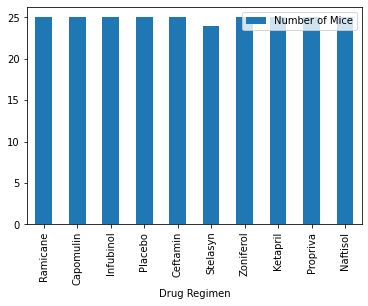

In [185]:
# bar graph using pandas
# as i understand it, this is the total number of mice per drug and not total number of data points per drug

mouse_num_plt = pd.DataFrame({
    "Drug Regimen": druglist,
    "Number of Mice": drug_len
})

mouse_num_plt.plot.bar(x="Drug Regimen", y="Number of Mice")

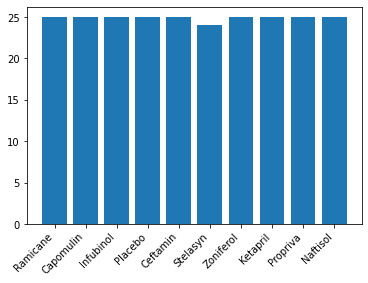

In [186]:
# bar graph using matplotlib
plt.bar(druglist, drug_len)
plt.xticks(rotation = 45, ha="right")

plt.show()

In [187]:
# pie graph using pandas
sexes = ["Male", "Female"]
sexnum = []
for sex in sexes:
    sexnum.append(len(trimmed_df.loc[trimmed_df["Sex"] == sex]["Mouse ID"].unique()))

sex_df = pd.DataFrame({
    "Sex": sexes,
    "Number": sexnum
}, index=sexes)

sex_df

,Sex,Number
Male,Male,125
Female,Female,124


<AxesSubplot:ylabel='Number'>

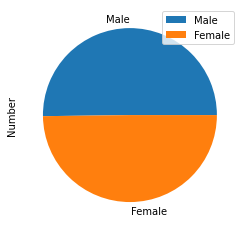

In [188]:
sex_df.plot.pie(y="Number")

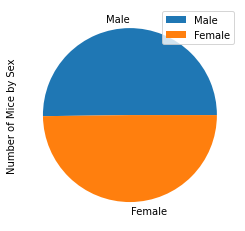

In [189]:
# pie graph using matplotlib
plt.pie(sexnum, labels=sexes)
plt.ylabel("Number of Mice by Sex")
plt.legend(sexes)
plt.show()

In [190]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
finaltumour_df = trimmed_df.drop_duplicates(subset=["Mouse ID"], keep="last")
finaltumour_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [191]:
# determine quartiles
capomulin = finaltumour_df.loc[finaltumour_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
cap_quartiles = capomulin.quantile([0.25, 0.5, 0.75])

ramicane = finaltumour_df.loc[finaltumour_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
ram_quartiles = ramicane.quantile([0.25, 0.5, 0.75])

infubinol = finaltumour_df.loc[finaltumour_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
inf_quartiles = infubinol.quantile([0.25, 0.5, 0.75])

ceftamin = finaltumour_df.loc[finaltumour_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
ceft_quartiles = ceftamin.quantile([0.25, 0.5, 0.75])

good_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for drug in good_drug:
    find_drug = finaltumour_df.loc[finaltumour_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    drug_quartiles = find_drug.quantile([0.25, 0.5, 0.75])
    lowerq = drug_quartiles[0.25]
    upperq = drug_quartiles[0.75]
    iqr = upperq - lowerq

    print(f"""The lower and upper quartiles for tumour size in mice treated with {drug} are {round(lowerq, 2)} and {round(upperq, 2)} respectively,
for an interquartile range of {round(iqr, 2)}.
Any values outside the range of {round(lowerq - 1.5 * iqr,2)} to {round(upperq + 1.5 * iqr,2)} could be outliers.
    """)

The lower and upper quartiles for tumour size in mice treated with Capomulin are 32.38 and 40.16 respectively,
for an interquartile range of 7.78.
Any values outside the range of 20.7 to 51.83 could be outliers.
    
The lower and upper quartiles for tumour size in mice treated with Ramicane are 31.56 and 40.66 respectively,
for an interquartile range of 9.1.
Any values outside the range of 17.91 to 54.31 could be outliers.
    
The lower and upper quartiles for tumour size in mice treated with Infubinol are 54.05 and 65.53 respectively,
for an interquartile range of 11.48.
Any values outside the range of 36.83 to 82.74 could be outliers.
    
The lower and upper quartiles for tumour size in mice treated with Ceftamin are 48.72 and 64.3 respectively,
for an interquartile range of 15.58.
Any values outside the range of 25.36 to 87.67 could be outliers.
    


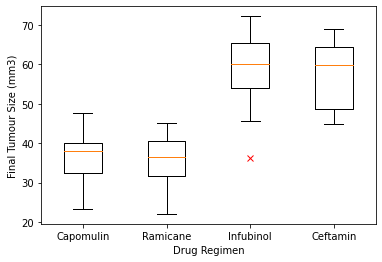

In [192]:
fig, ax1 = plt.subplots()
ax1.boxplot([capomulin, ramicane, infubinol, ceftamin], flierprops={"marker": "x", "markeredgecolor": "red"})

ax1.set_ylabel("Final Tumour Size (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


plt.show()

In [193]:
# identify outlier as displayed in graph above
finaltumour_df.loc[(finaltumour_df["Drug Regimen"] == "Infubinol") & (finaltumour_df["Tumor Volume (mm3)"] < 36.83)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [194]:
# select a mouse treated with capomulin. selecting mouse id: x401
mouse = merge_df.loc[merge_df["Mouse ID"] == "x401"]
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


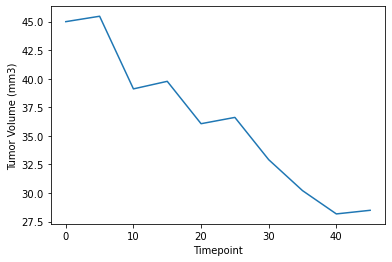

In [195]:
# plot tumour size over time for selected mouse
time = mouse["Timepoint"]
tumour_mouse = mouse["Tumor Volume (mm3)"]

plt.plot(time, tumour_mouse)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [196]:
# plot scatter for capomulin mice
capomulin_df = finaltumour_df.loc[finaltumour_df["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2


The r-squared is: 0.7686134812138998


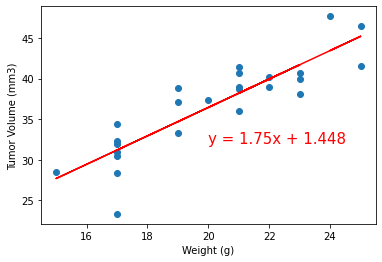

In [197]:
# scatter + linear regression
weight = capomulin_df["Weight (g)"]
tumour_mice = capomulin_df["Tumor Volume (mm3)"]

plt.scatter(weight, tumour_mice)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# line info
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumour_mice)
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
regress_values = weight * slope + intercept
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,32),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()